# **Capstone 1 – Part 1: Employee Attrition Analysis**

*Author: Shreyas Dasari*

## **Dataset**

Download the dataset as a CSV file from [here](https://drive.google.com/file/d/1XSn3XlnNV46gaFz0i81ZiflIvuv8XYId/view).

---

## **Context & Problem Statement**

This fictional dataset contains up to 30 features, including categorical and discrete data. These features are a mix of numerical and text values and help analyze employee data throughout the lifecycle—from hiring to offboarding, including attrition events.

Employee attrition has long been a significant concern for organizations due to the substantial investments required in training new employees. The departure of an employee leads to several costs: hiring replacements, retraining, workflow disruptions, and reduced morale among remaining staff. Furthermore, attrition can erode trust and increase management challenges.

This HR Attrition dataset, though fictional, is structured to identify the key factors influencing employee retention and attrition. In this capstone, we will thoroughly analyze these features and apply predictive modeling techniques to better understand attrition patterns and make accurate predictions.

---

## **Business Use Case**

* Provide a brief overview of attrition within the organization.
* Explore the main factors that lead to employee attrition.
* Identify relevant contributors to employee performance ratings and calculate their correlations.

---

## **Goals / Metrics**

* Identify the top reasons behind attrition and recommend appropriate action steps.
* Highlight the key factors driving employee performance.

---

## **TODO**

You are required to use **Python**, along with **Pandas**, **NumPy**, **Matplotlib**, and other relevant libraries to accomplish the following tasks:

### **1. Data Retrieval (1 point)**

* Load the dataset from the source (CSV file).
* Explore the dataset structure, features, and the target variable: `Attrition`.
* Understand the context and importance of each feature in relation to employee attrition.

---

### **2. Data Preprocessing (2 points)**

* Clean the dataset by handling missing values, duplicates, and outliers.
* Encode categorical variables and transform data types where necessary.

---

### **3. Feature Engineering & Exploratory Data Analysis (EDA) (3 points)**

* Create new variables (e.g., employee tenure, performance metrics).
* Analyze factors contributing to attrition (e.g., age, job role, salary, work environment).
* Visualize attrition rates across demographic and employment-related variables.
* Identify patterns and correlations that drive attrition.
* Include both 1-D and 2-D exploratory analysis for better understanding of the data.

---

### **4. Effective Communication (2 points)**

* Use **Markdown cells** to document your thought process:

  * Why each step was taken
  * What the insights were from each visualization
* Ensure all **plots are clearly labeled** and easy to interpret.
* **Comment your code** so it is understandable and review-ready.

---

## **Grading & Important Instructions**

* All tasks are **mandatory** and should be completed sincerely.
* Before submitting, ensure your code runs without errors.
* You may use external resources (e.g., ChatGPT, StackOverflow), but **cite your references** in the notebook.
* If stuck, attempt debugging via online sources. If unresolved, reach out for support.
* **Minimum score required**: 7/10
  A lower score will require resubmission.
* **Feedback types**:

  * **Awesome** (well done)
  * **Suggestion** (optional improvement)
  * **Required** (must fix before resubmission)
* **Submission**: Upload your project to **GitHub** and share the link via the LMS.

In [92]:
# Importing libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Reading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ShreyasDasari/HR-Employee-Attrition-Analysis/refs/heads/main/Data/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [94]:
# Checking the size of the dataset
df.shape

(1470, 35)

In [95]:
# Null values check
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [96]:
# Checking data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [97]:
# Feature Engineering
df['IncomeCategory'] = pd.qcut(df['MonthlyIncome'],
                               q=4,
                               labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Employee Tenure Categories
df['TenureCategory'] = pd.cut(df['YearsAtCompany'],
                             bins=[0, 2, 5, 10, 20, 50],
                             labels=['0-2 years', '2-5 years', '5-10 years', '10-20 years', '20+ years'])

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

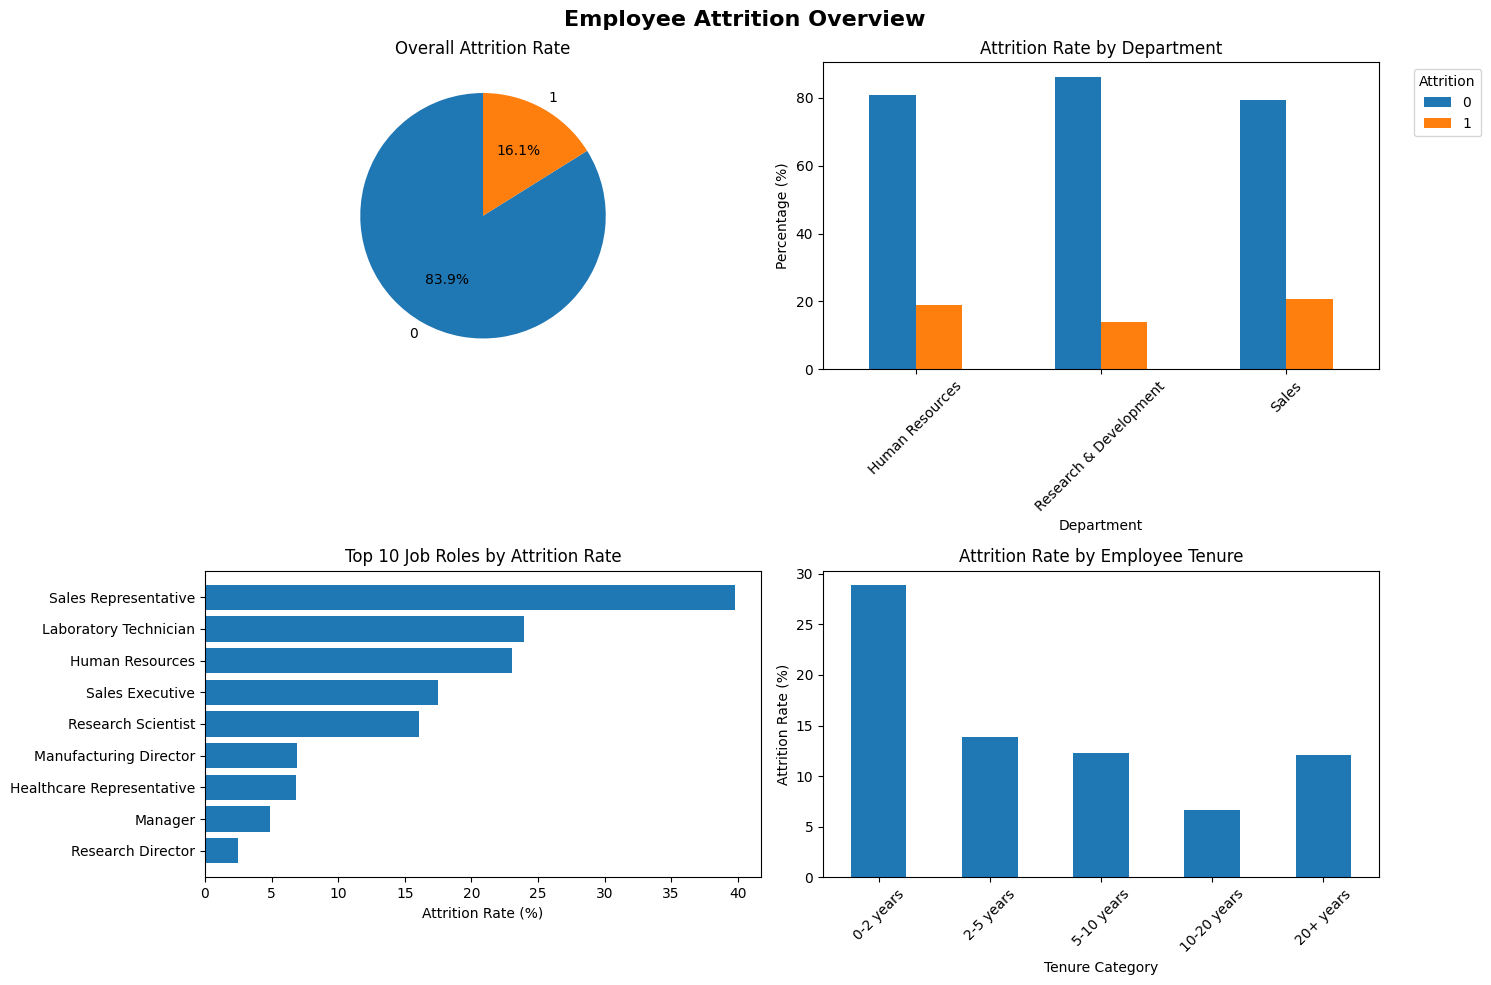

In [98]:
# Vizulizing the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Employee Attrition Overview', fontsize=16, fontweight='bold')

# 1.1 Attrition Rate
ax1 = axes[0, 0]
attrition_counts = df['Attrition'].value_counts()
ax1.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Overall Attrition Rate')

# 1.2 Attrition by Department
ax2 = axes[0, 1]
dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
dept_attrition.plot(kind='bar', ax=ax2)
ax2.set_title('Attrition Rate by Department')
ax2.set_xlabel('Department')
ax2.set_ylabel('Percentage (%)')
ax2.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# 1.3 Attrition by Job Role
ax3 = axes[1, 0]
role_attrition = df.groupby('JobRole')['Attrition'].agg(['mean', 'count'])
role_attrition = role_attrition.sort_values('mean', ascending=False)
top_roles = role_attrition.head(10)
ax3.barh(top_roles.index, top_roles['mean'] * 100)
ax3.set_xlabel('Attrition Rate (%)')
ax3.set_title('Top 10 Job Roles by Attrition Rate')
ax3.invert_yaxis()

# 1.4 Attrition by Tenure Category
ax4 = axes[1, 1]
tenure_attrition = pd.crosstab(df['TenureCategory'], df['Attrition'], normalize='index') * 100
tenure_attrition[1].plot(kind='bar', ax=ax4)
ax4.set_title('Attrition Rate by Employee Tenure')
ax4.set_xlabel('Tenure Category')
ax4.set_ylabel('Attrition Rate (%)')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

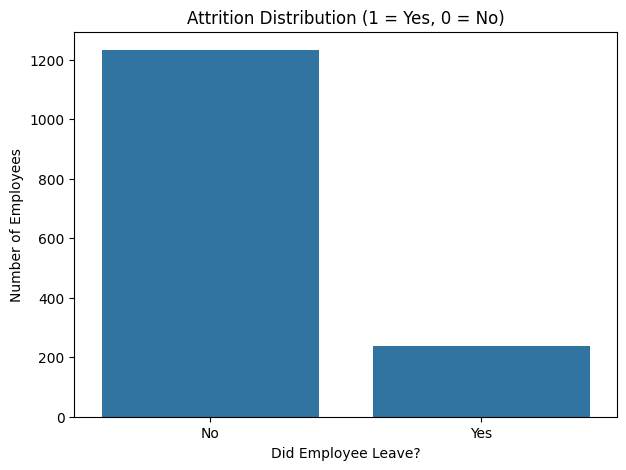

In [99]:
# 1-D Analysis and plotting

# Let's see the overall distribution of attrition.
plt.figure(figsize=(7, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution (1 = Yes, 0 = No)')
plt.xlabel('Did Employee Leave?')
plt.ylabel('Number of Employees')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The plot shows that fewer employees have left than have stayed. This is a common scenario but is important to note for future modeling (class imbalance).

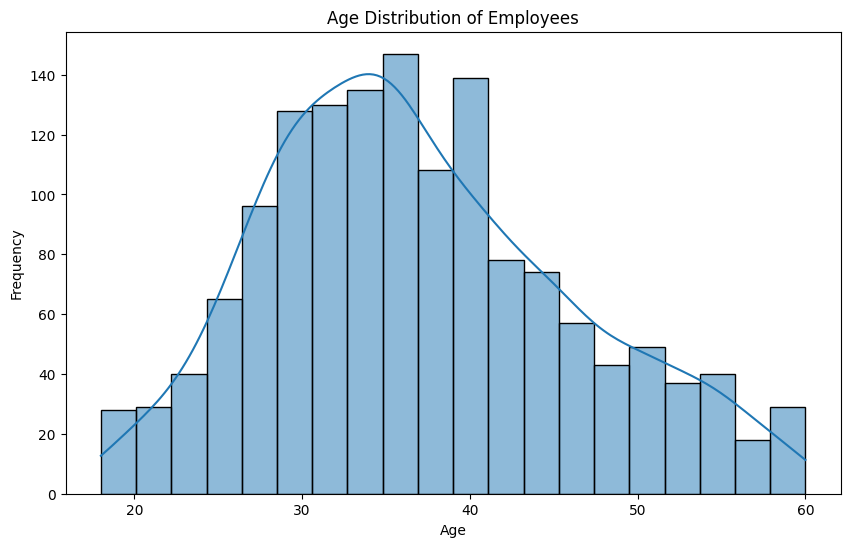

In [100]:
# Let's look at the age of employees.
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True) # kde adds a smooth line
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The workforce is concentrated in the 25-45 age range.

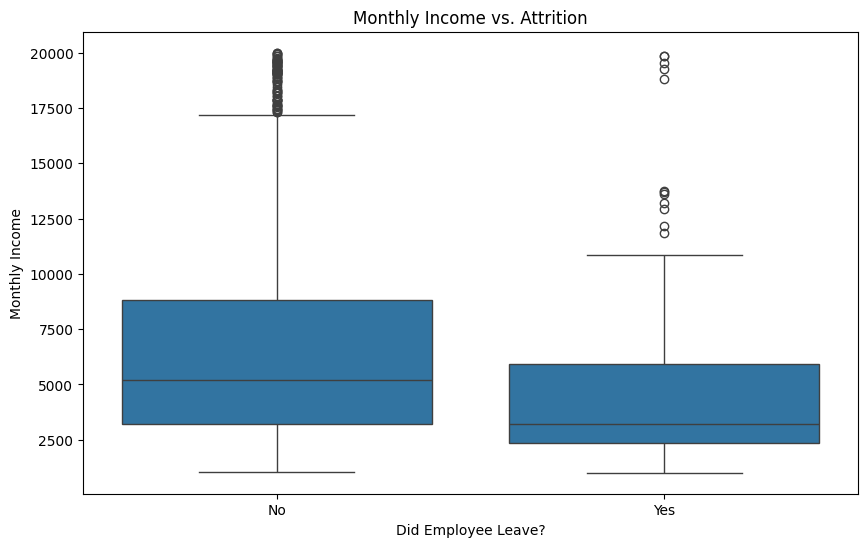

In [101]:
# Is income a factor in attrition?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Did Employee Leave?')
plt.ylabel('Monthly Income')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The median monthly income for employees who left is visibly lower than for those who stayed. This suggests income is a significant factor.

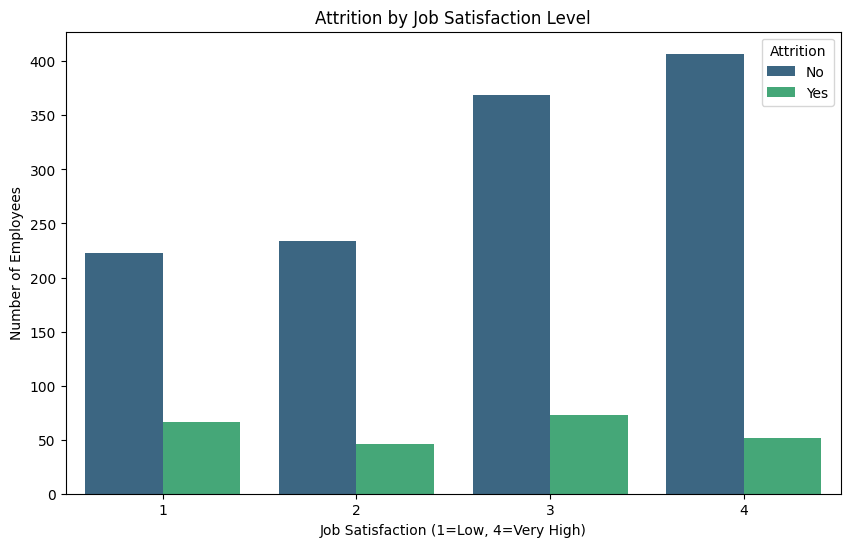

In [102]:
# Are unhappy employees more likely to leave?
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='viridis')
plt.title('Attrition by Job Satisfaction Level')
plt.xlabel('Job Satisfaction (1=Low, 4=Very High)')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

While attrition occurs across all satisfaction levels, there's a notable number of departures from employees with low job satisfaction (level 1).

In [103]:
# Finding features with object data type
df_object = df.select_dtypes(include='object')
df_object.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [104]:
df_object.nunique()

,0
BusinessTravel,3
Department,3
EducationField,6
Gender,2
JobRole,9
MaritalStatus,3
Over18,1
OverTime,2


In [105]:
df_object['JobRole'].value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [106]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

['EmployeeCount', 'Over18', 'StandardHours']

In [107]:
df.drop(constant_columns, inplace=True, axis=1)

In [108]:
df.shape

(1470, 34)

In [109]:
# Handling categorical data
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [110]:
# Identifying multiclass categorical features
mcat = [col for col in df_object.columns if df_object[col].nunique() > 2]
mcat

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [111]:
# One Hot encoding for handling multiclass categorical features
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True, dtype=int)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,4,1,92,2,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,7,1,1,40,3,...,0,1,0,0,0,0,0,0,1,0


In [112]:
# Dropping categorical data
df.drop(columns=['IncomeCategory','TenureCategory'], axis=1, inplace=True)

In [113]:
# Correlation matrix
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,-0.036311,0.024287,0.029820,...,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,...,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,-0.011716,0.023381,0.046135,...,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,-0.001851,0.031131,0.008783,...,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,-0.016547,0.016775,0.042438,...,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.022556,0.035179,-0.006888,...,0.067287,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,0.053933,-0.035189
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,0.000508,-0.049857,-0.008278,...,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.022556,0.000508,1.000000,-0.000478,0.017960,...,0.036082,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,-0.007804,-0.032752
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,-0.000478,1.000000,0.042861,...,-0.016189,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,0.036432,-0.033436
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.017960,0.042861,1.000000,...,-0.004952,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.028324,-0.045253


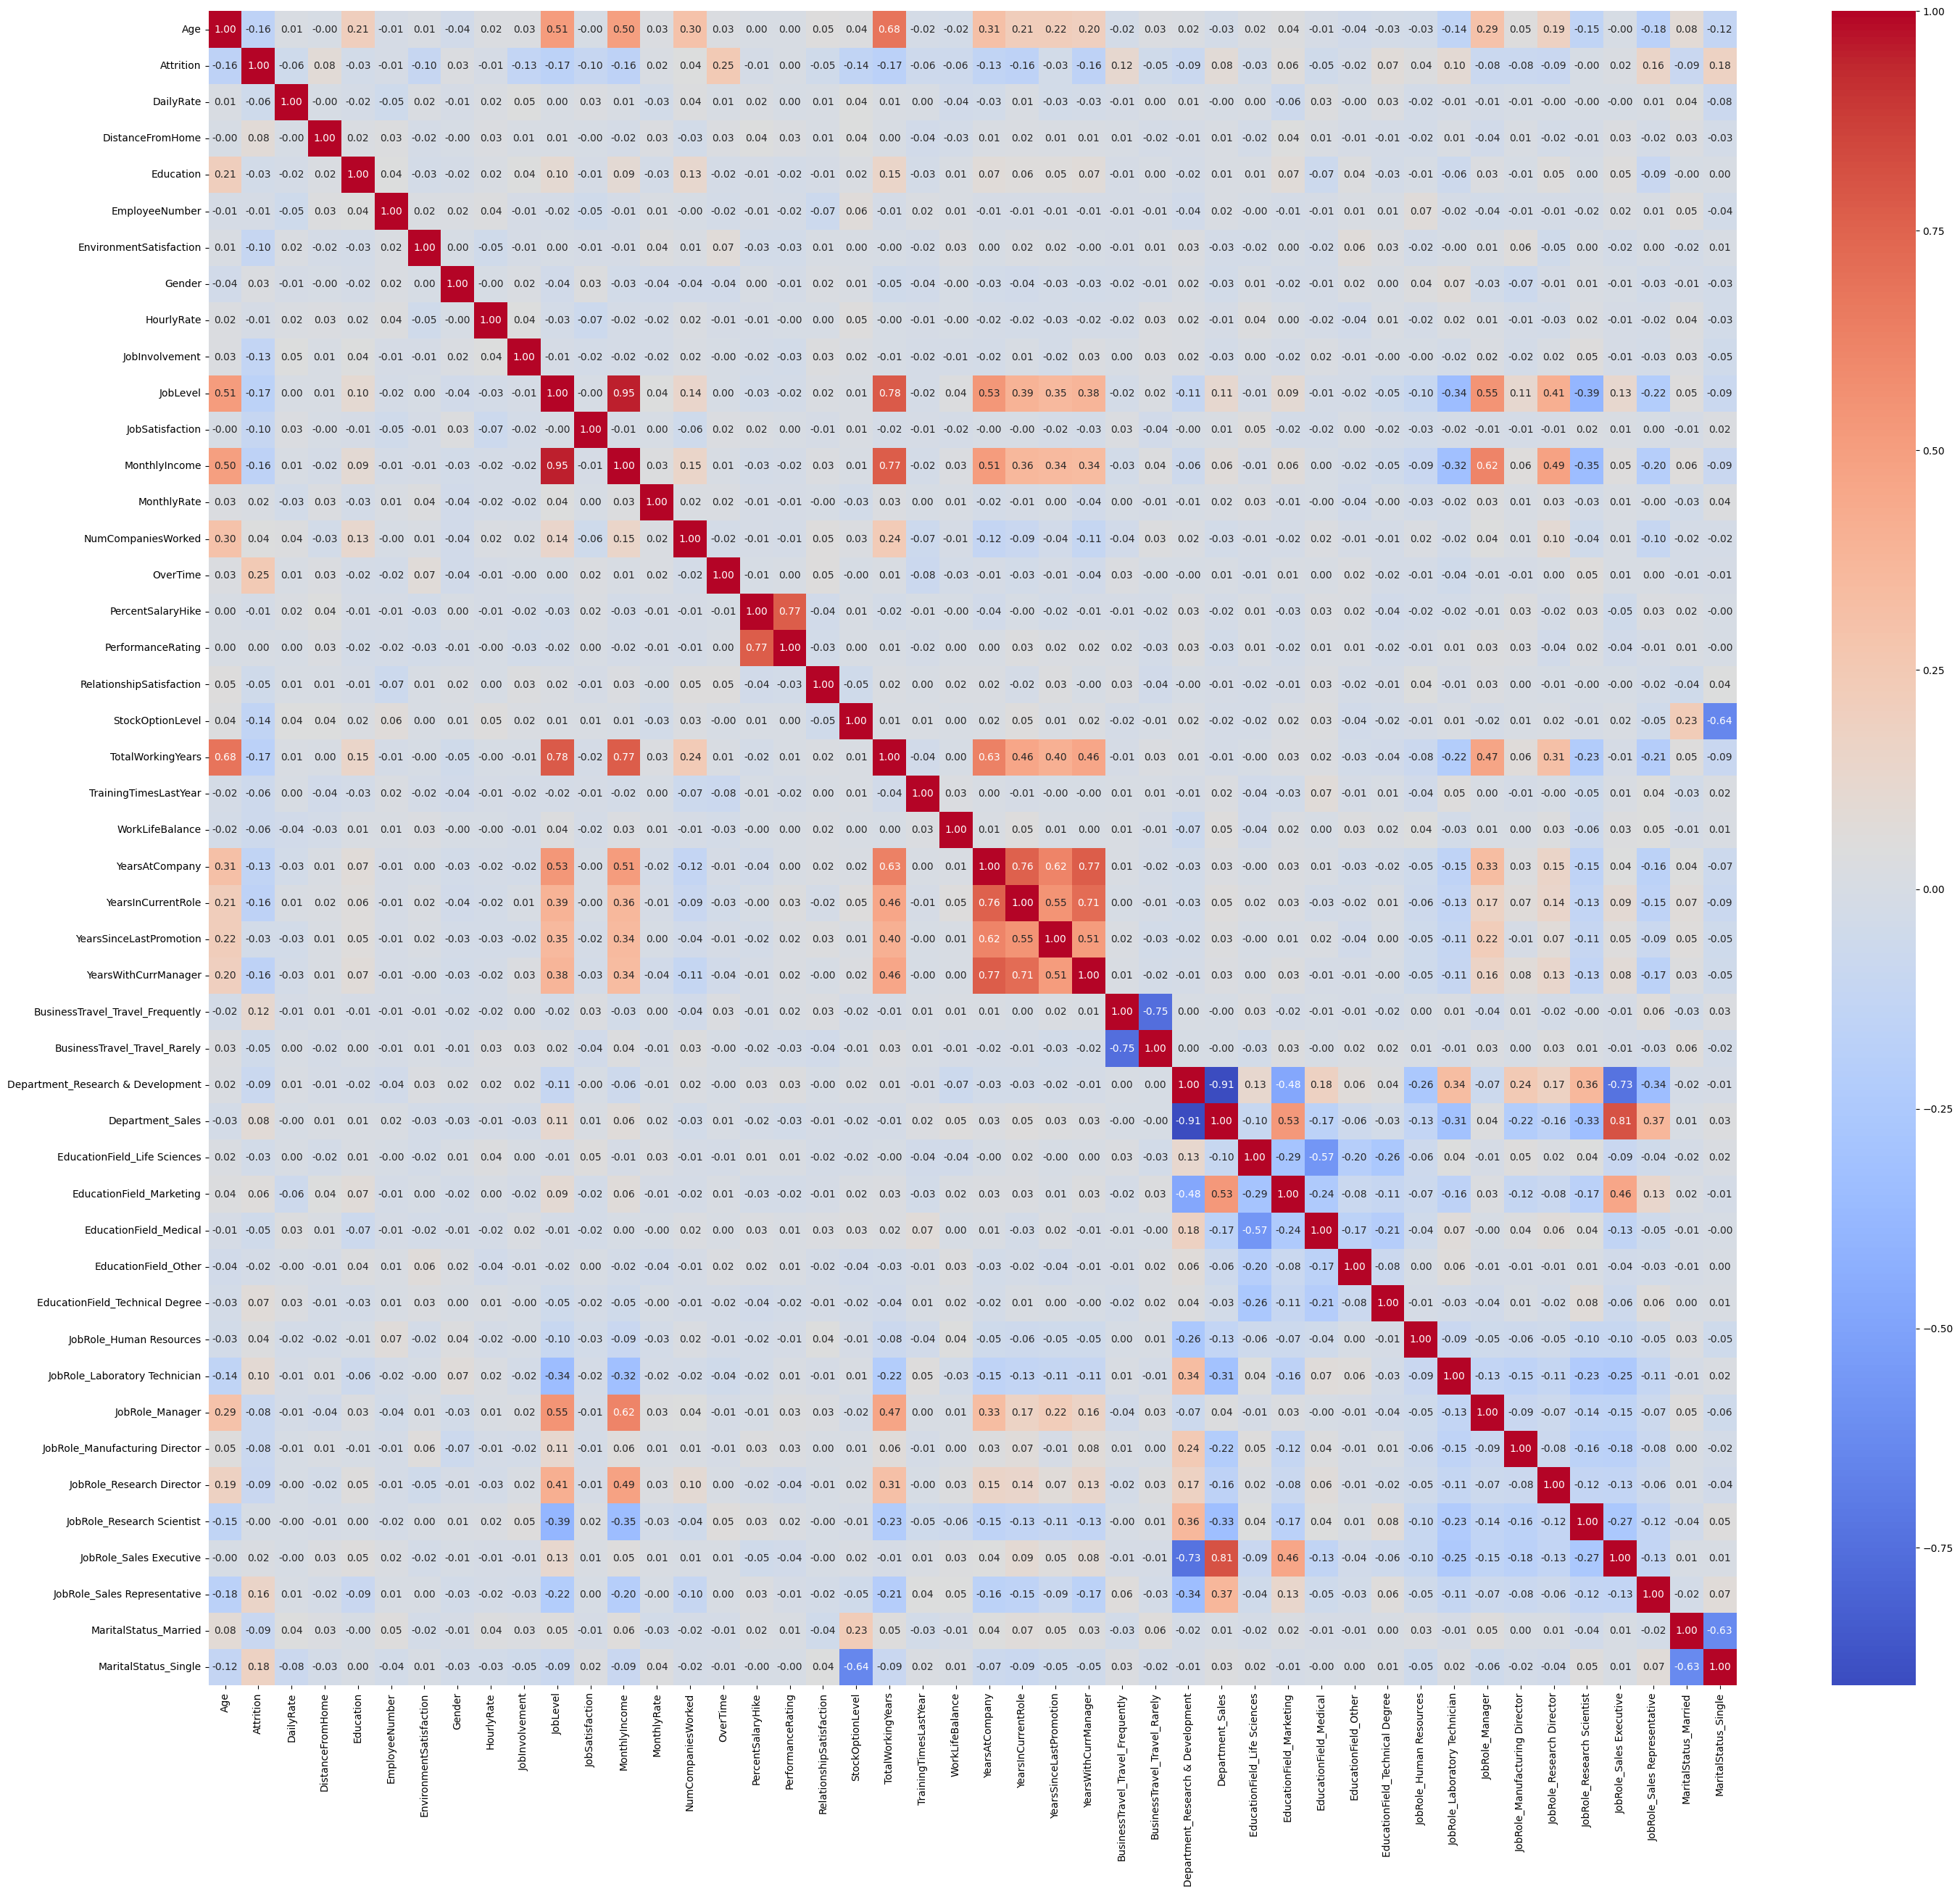

In [114]:
# Displaying the heatmap
import seaborn as sns
plt.figure(figsize=(34, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# HeatMap Insights

- Positive Correlations with Attrition: 'OverTime' has the strongest positive correlation (0.25). This means employees who work overtime are more likely to leave.
- Negative Correlations with Attrition: 'TotalWorkingYears' (-0.17), 'JobLevel' (-0.17), 'YearsInCurrentRole' (-0.16), and 'MonthlyIncome' (-0.16) show that employees with more experience, higher job levels, and better pay are less likely to leave.

In [115]:
# Predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

X = df.drop(columns=['Attrition'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Choosing RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
acc = accuracy_score(y_test, y_pred)
acc

0.8775510204081632

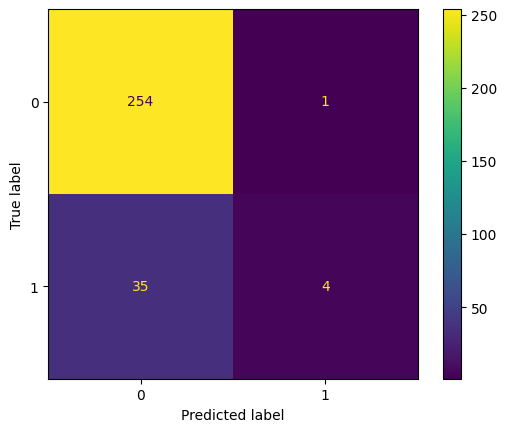

In [121]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [124]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [125]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

np.float64(0.7489693313222726)

Model predicts NO's well but have difficulty predicting YES, because of class imbalance.

## Conclusion and Final Recommendations:

- Overtime is the single biggest predictor of attrition.
- Young employees and those in their first 2 years are at highest risk.
- Low compensation significantly increases attrition risk.
- Certain roles like Sales Representatives have inherently higher turnover.

### Citations:
Referred ChatGPT and Claude like LLMs and stackoverflow and geeksforgeeks.